In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import tensorflow as tf 
from tensorflow.keras import models,layers

In [2]:
df_train_raw = pd.read_csv('./data/titanic/train.csv')
df_test_raw = pd.read_csv('./data/titanic/test.csv')
df_train_raw.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,493,0,1,"Molson, Mr. Harry Markland",male,55.0,0,0,113787,30.5000,C30,S
1,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
2,388,1,2,"Buss, Miss. Kate",female,36.0,0,0,27849,13.0000,NaN,S
3,192,0,2,"Carbines, Mr. William",male,19.0,0,0,28424,13.0000,NaN,S
4,687,0,3,"Panula, Mr. Jaako Arnold",male,14.0,4,1,3101295,39.6875,NaN,S


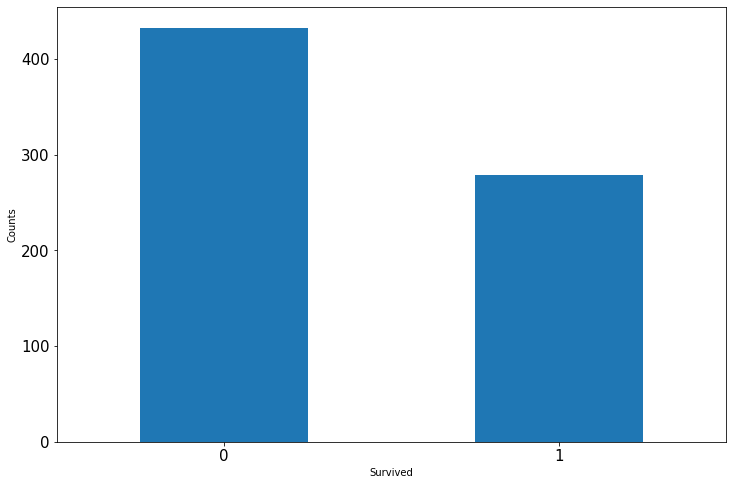

In [3]:
ax = df_train_raw['Survived'].value_counts().plot(kind = 'bar',figsize = (12,8),fontsize =15,rot =0)
ax.set_ylabel('Counts')
ax.set_xlabel('Survived')
plt.show()

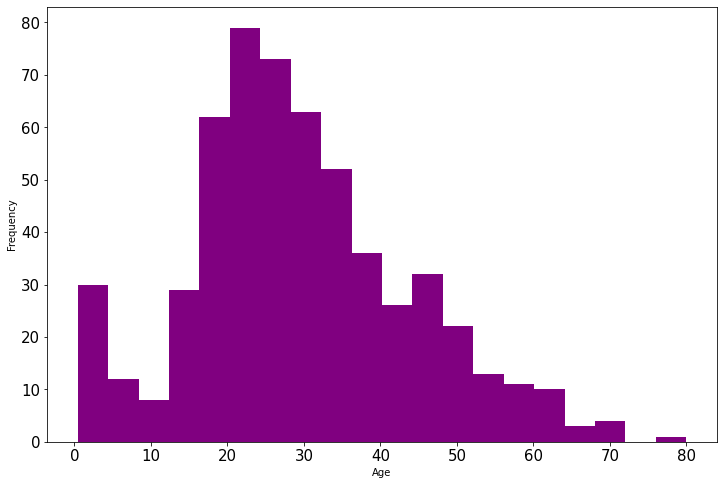

In [4]:
ax = df_train_raw['Age'].plot(kind = 'hist',bins = 20,color = 'purple',
figsize = (12,8),fontsize = 15)
ax.set_ylabel('Frequency')
ax.set_xlabel('Age')
plt.show()

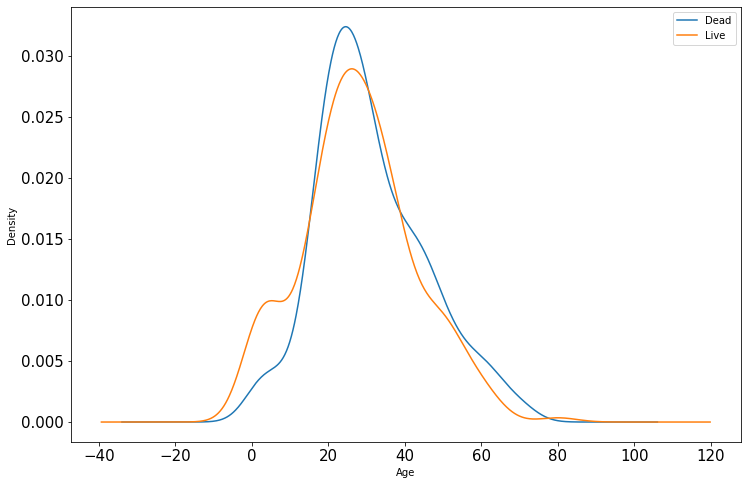

In [5]:
ax = df_train_raw[df_train_raw['Survived']==0]['Age'].plot(kind = 'density',figsize = (12,8),fontsize =15,label = 'Dead')
df_train_raw[df_train_raw['Survived']==1]['Age'].plot(kind = 'density',figsize = (12,8),fontsize =15,label = 'Live')
ax.legend()
ax.set_ylabel('Density')
ax.set_xlabel('Age')
plt.show()

In [6]:
def preprocessing(dfdata):

    dfresult= pd.DataFrame()

    #Pclass
    dfPclass = pd.get_dummies(dfdata['Pclass'])
    dfPclass.columns = ['Pclass_' +str(x) for x in dfPclass.columns ]
    dfresult = pd.concat([dfresult,dfPclass],axis = 1)

    #Sex
    dfSex = pd.get_dummies(dfdata['Sex'])
    dfresult = pd.concat([dfresult,dfSex],axis = 1)

    #Age
    dfresult['Age'] = dfdata['Age'].fillna(0)
    dfresult['Age_null'] = pd.isna(dfdata['Age']).astype('int32')

    #SibSp,Parch,Fare
    dfresult['SibSp'] = dfdata['SibSp']
    dfresult['Parch'] = dfdata['Parch']
    dfresult['Fare'] = dfdata['Fare']

    #Carbin
    dfresult['Cabin_null'] =  pd.isna(dfdata['Cabin']).astype('int32')

    #Embarked
    dfEmbarked = pd.get_dummies(dfdata['Embarked'],dummy_na=True)
    dfEmbarked.columns = ['Embarked_' + str(x) for x in dfEmbarked.columns]
    dfresult = pd.concat([dfresult,dfEmbarked],axis = 1)

    return(dfresult)

x_train = preprocessing(df_train_raw)
y_train = df_train_raw['Survived'].values

x_test = preprocessing(df_test_raw)
y_test = df_test_raw['Survived'].values

print("x_train.shape =", x_train.shape )
print("x_test.shape =", x_test.shape )

x_train.shape = (712, 15)
x_test.shape = (179, 15)


In [7]:
tf.keras.backend.clear_session()

model = models.Sequential()
model.add(layers.Dense(20,activation='relu',input_shape = (15,)))
model.add(layers.Dense(10,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                320       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 541
Trainable params: 541
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['AUC'])
history = model.fit(x_train,y_train,batch_size=64,epochs=30,validation_split=0.2)


Epoch 1/30
9/9 [==============================] - 0s 54ms/step - loss: 1.3366 - auc: 0.4634 - val_loss: 1.0712 - val_auc: 0.4682
Epoch 2/30
9/9 [==============================] - 0s 4ms/step - loss: 0.9633 - auc: 0.4809 - val_loss: 0.7946 - val_auc: 0.4748
Epoch 3/30
9/9 [==============================] - 0s 4ms/step - loss: 0.7536 - auc: 0.4975 - val_loss: 0.6787 - val_auc: 0.5882
Epoch 4/30
9/9 [==============================] - 0s 4ms/step - loss: 0.6746 - auc: 0.6059 - val_loss: 0.6594 - val_auc: 0.6643
Epoch 5/30
9/9 [==============================] - 0s 5ms/step - loss: 0.6500 - auc: 0.6653 - val_loss: 0.6541 - val_auc: 0.6905
Epoch 6/30
9/9 [==============================] - 0s 5ms/step - loss: 0.6345 - auc: 0.7077 - val_loss: 0.6554 - val_auc: 0.6897
Epoch 7/30
9/9 [==============================] - 0s 4ms/step - loss: 0.6265 - auc: 0.7160 - val_loss: 0.6548 - val_auc: 0.6970
Epoch 8/30
9/9 [==============================] - 0s 5ms/step - loss: 0.6210 - auc: 0.7209 - val_loss: 

In [10]:
import matplotlib.pyplot as plt 
def plot_metric(history,metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_' + metric]
    epochs = range(1,len(train_metrics)+1)
    plt.plot(epochs,train_metrics,'bo--')
    plt.plot(epochs,val_metrics,'ro-')
    plt.title('Training and Validation' + metric)
    plt.xlabel('Epochs')
    plt.ylabel(metric)
    plt.legend(['train_'+metric,'val_'+metric])
    plt.show()

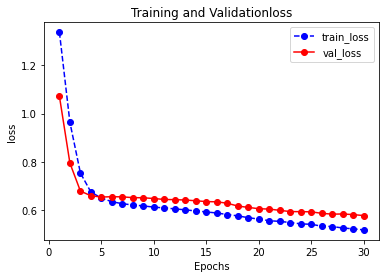

In [11]:
plot_metric(history,'loss')

In [14]:
history.history.keys()

dict_keys(['loss', 'auc', 'val_loss', 'val_auc'])

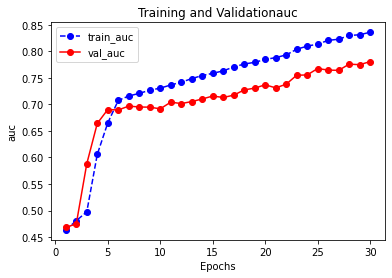

In [16]:
plot_metric(history,'auc')

In [17]:
model.evaluate(x = x_test,y = y_test)


6/6 [==============================] - 0s 1ms/step - loss: 0.5162 - auc: 0.8254


[0.5161952972412109, 0.8253967761993408]

In [18]:
model.predict(x_test[:5])

array([[0.16639069],
       [0.45411667],
       [0.3564701 ],
       [0.51440614],
       [0.41143137]], dtype=float32)

In [19]:
model.predict_classes(x_test[:5])

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([[0],
       [0],
       [0],
       [1],
       [0]])

In [25]:
(model.predict(x_test[:5]) > 0.5).astype("int32")

array([[0],
       [0],
       [0],
       [1],
       [0]])

In [26]:
model.save('./data/day1_keras_model.h5')
del model
model = models.load_model('./data/day1_keras_model.h5')
model.evaluate(x_test,y_test)


6/6 [==============================] - 0s 3ms/step - loss: 0.5162 - auc: 0.8254


[0.5161952972412109, 0.8253967761993408]

In [27]:
model.save('./data/day1_tf_model',save_format='tf')
model_loaded = tf.keras.models.load_model('./data/day1_tf_model')
model_loaded.evaluate(x_test,y_test)


INFO:tensorflow:Assets written to: ./data/day1_tf_model\assets
6/6 [==============================] - 0s 2ms/step - loss: 0.5162 - auc: 0.8254


[0.5161952972412109, 0.8253967761993408]